## Planning Stage: Data Description & Exploratory Data Analysis

In [1]:
library(tidyverse)
library(broom)
library(rsample)
library(leaps)
library(car)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




### (1) Data Description
The dataset contains 10,000 observations and 12 variables related to student placements. It includes numeric variables such as CGPA, internships, projects, and test scores, as well as categorical variables like extracurricular activities and placement status.

- StudentID (Integer, numeric) - It is a unique identifier for each student.
- CGPA (Integer, numeric) - It is the overall grades achieved by the student.
- Internships (Float/Double, numeric) - It tells the number of internships a student has done.
- Projects (Integer, numeric) - Number of projects a student has done.
- Workshops/Certifications (Integer, numeric) - As there are multiple courses available online student opt for them to upskill themselves.
- ApptitudeTestScore (Integer, numeric) - Aptitude test are generally a part of the recruitment process to understand the Quant and logical thinking of the student.
- SoftSkillrating (Float/Double, numeric) - Communication is a key role that plays in the placement or in any aspect of the life.
- ExtraCurricularActivities (Character, categorical) - This helps provide and insight about the personality of an individual regarding how much he is active other than the academic.
- PlacementTraining (Character, categorical) - It is provided to students in college to ace the placement process.
- SSC (Integer, numeric) - Senior Secondary Marks.
- HSC (Integer, numeric) - Higher Secondary Marks.
- PlacementStatus (Character, categorical) - This is our target column with two classes placed and not placed.

### Reference
#### Sources
- Dataset: Kumbhar, Ruchika. "Placement Prediction Dataset." Kaggle, https://www.kaggle.com/datasets/ruchikakumbhar/placement-prediction-dataset/data.
- Model Training Reference: GeeksforGeeks, Train a Model Using CatBoost, https://www.geeksforgeeks.org/train-a-model-using-catboost/.

#### Collection Methodology
The dataset was likely collected from academic records and placement training programs, which reflects real-world student placement outcomes.
More details on training a machine learning model (e.g., CatBoost) for placement prediction can be found at GeeksforGeeks: https://www.geeksforgeeks.org/train-a-model-using-catboost/.

### Pre-selection of variables
We'll not use StudentID as an explanatory variable because it is merely a unique identifier for each student and does not carry any meaningful information about their placement status. 

### (2) Question
a) `Quesiton` We want to examine the association between student placement status (response) and various predictors related to academic performance (e.g., CGPA, SSC and HSC), professional experience (e.g., number of internships and projects), extracurricular activities (e.g., workshops, certifications and participation in placement training). 

The response variable (PlacementStatus) is categorical (Placed/Not Placed), so we'll use logistic regression model in later process.

b) This question can be focused on both inference and prediction. Our primary focus is on inference, as we aim to understand the impact of different factors on placement outcomes and determine which variables significantly influence employability. However, there is also a predictive component, as identifying key predictors can help forecast likelihood of getting placed for a given student based on their academic and extracurricular profile.

### (3) Exploratory Data Analysis and Visualization
#### 1. Load and Clean the Data

In [2]:
# Load the dataset
placement_data <- read_csv("https://raw.githubusercontent.com/Sunnie568/STAT-301-group-project/refs/heads/main/data/placementdata.csv")

# Check for missing values
sum(is.na(placement_data))

Rows: 10000 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): ExtracurricularActivities, PlacementTraining, PlacementStatus
dbl (9): StudentID, CGPA, Internships, Projects, Workshops/Certifications, A...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 0

In [3]:
# Convert categorical variables to factors
placement_data <- placement_data %>%
  mutate(
    PlacementStatus = factor(PlacementStatus, levels = c("NotPlaced", "Placed")),
    ExtracurricularActivities = factor(ExtracurricularActivities, levels = c("No", "Yes")),
    PlacementTraining = factor(PlacementTraining, levels = c("No", "Yes"))
  )

head(placement_data)
nrow(placement_data)

# View dataset structure
str(placement_data)

StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>
1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
6,7.0,0,2,2,71,4.2,Yes,No,55,66,NotPlaced


[1] 10000

tibble [10,000 × 12] (S3: tbl_df/tbl/data.frame)
 $ StudentID                : num [1:10000] 1 2 3 4 5 6 7 8 9 10 ...
 $ CGPA                     : num [1:10000] 7.5 8.9 7.3 7.5 8.3 7 7.7 7.7 6.5 7.8 ...
 $ Internships              : num [1:10000] 1 0 1 1 1 0 1 2 1 1 ...
 $ Projects                 : num [1:10000] 1 3 2 1 2 2 1 1 1 3 ...
 $ Workshops/Certifications : num [1:10000] 1 2 2 2 2 2 1 0 0 2 ...
 $ AptitudeTestScore        : num [1:10000] 65 90 82 85 86 71 76 85 84 79 ...
 $ SoftSkillsRating         : num [1:10000] 4.4 4 4.8 4.4 4.5 4.2 4 3.5 3.9 4.4 ...
 $ ExtracurricularActivities: Factor w/ 2 levels "No","Yes": 1 2 2 2 2 2 1 2 1 2 ...
 $ PlacementTraining        : Factor w/ 2 levels "No","Yes": 1 2 1 2 2 1 1 2 2 2 ...
 $ SSC_Marks                : num [1:10000] 61 78 79 81 74 55 62 59 75 85 ...
 $ HSC_Marks                : num [1:10000] 79 82 80 80 88 66 65 72 71 86 ...
 $ PlacementStatus          : Factor w/ 2 levels "NotPlaced","Placed": 1 2 1 2 2 1 1 1 1 2 ...


#### 2. Visualization

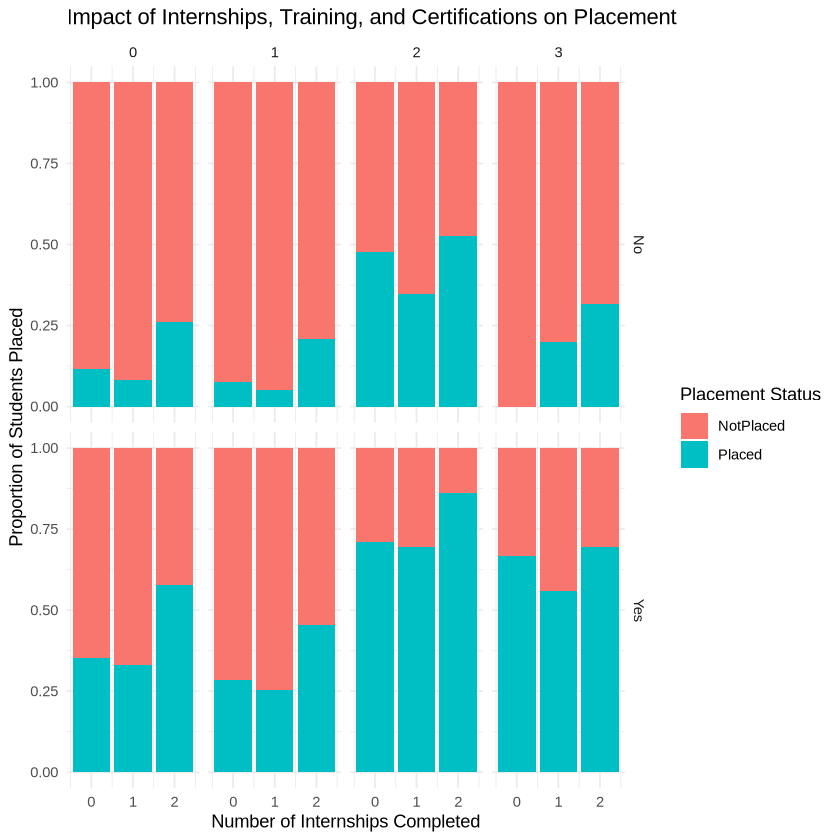

In [4]:
ggplot(placement_data, aes(x = Internships, fill = PlacementStatus)) +
  geom_bar(position = "fill") +
  facet_grid(PlacementTraining ~ `Workshops/Certifications`) +
  labs(
    title = "Impact of Internships, Training, and Certifications on Placement",
    x = "Number of Internships Completed",
    y = "Proportion of Students Placed",
    fill = "Placement Status",
  ) +
  theme_minimal()

- Placement Status (Response Variable)
- Number of Internships (X-axis)
- Placement Training (Row Facet)
- Number of Workshops/Certifications (Column Facet)

The proposed stacked bar chart visualizes the impact of internships, placement training, and workshops/certifications on student placement status. The X-axis represents the number of internships completed, while the fill color differentiates between students who were placed and those who were not. The facet grid divides the data by placement training (row facet) and workshops/certifications (column facet).

It explores three key factors to determine their combined effect on placement outcomes. As can be seen from the graph, a higher percentage of students were placed in the group of attending placement training. It suggests placement training play a crucial role in employability. Also, possession of several certificates may help being placed. However, students with one internship do not necessarily have a higher placement rate than those without across all facets. Trying to do the best in all these three aspects included in this plot may be counterproductive, as the plot shows that the proportion of being placed do not increase.